# Modeling Part 2

In [4]:
#Import packages
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import folium
#from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import anderson
from scipy.stats import norm
from matplotlib import pylab

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

import warnings
import pickle

In [2]:
#import dataset created in Data Understanding
accidents = pd.read_csv(r"C:\Users\DETCAO03\V-Case study\02_Dataset\Used\Cleaned_dataset_accidents.csv",low_memory=False, encoding='utf-8')

## Input and response variable

In [11]:
#define influencing and response variable
X = accidents.drop("Accident_Severity", axis=1)
y = accidents["Accident_Severity"]
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Classifier, train and test

In [12]:
#Classifier
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, splitter='best')
lin_reg=LinearRegression()
log_reg=LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=200)
#svc_model=SVC()

dt = dt.fit(X_train, y_train)
lin_reg=lin_reg.fit(X_train,y_train)
log_reg=log_reg.fit(X_train,y_train)
nb.fit(X_train, y_train)
rf.fit(X_train,y_train)
#svc_model=svc_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

### Random Forest

In [13]:
#Random Forest
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
acc_rf = round(rf.score(X_test, y_test) * 100, 2)
sk_report = classification_report(digits=6, y_true=y_test, y_pred=y_pred)
print("Random Forest")
print("Accuracy", acc_rf)
print("Cohen Kappa: "+str(cohen_kappa_score(y_test,y_pred)))
print("\n")
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Random Forest
Accuracy 83.58
Cohen Kappa: 0.03652317805745087


              precision    recall  f1-score   support

           1   0.073034  0.007626  0.013810      6819
           2   0.228424  0.048168  0.079559     72642
           3   0.854840  0.974092  0.910578    454694

    accuracy                       0.835834    534155
   macro avg   0.385433  0.343295  0.334649    534155
weighted avg   0.759671  0.835834  0.786116    534155



Predicted,1,2,3,All
Actual,,,,
1,52,531,6236,6819
2,168,3499,68975,72642
3,492,11288,442914,454694
All,712,15318,518125,534155


### Influencing variables according to random forest algorithm

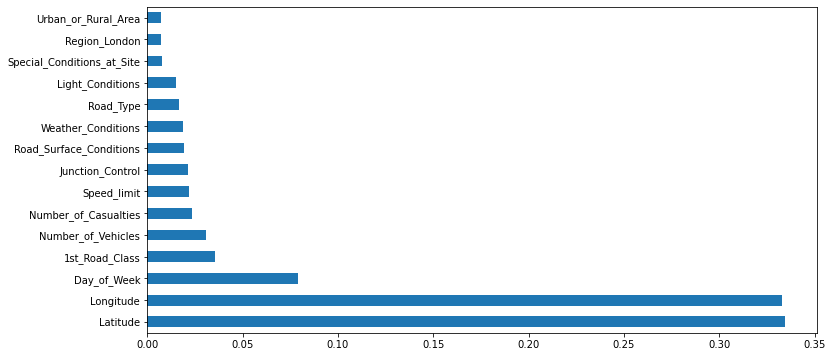

In [22]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
pylab.savefig(r"C:\Users\DETCAO03\1.6mil-Accidents-UK\03_Code\04_Pictures\Random_Forest_Influencing15.png")

### Naive Bayes

In [23]:
#Naive Bayes
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
sk_report = classification_report(digits = 6, y_true = y_test, y_pred = y_pred)
print("NB")
print("Accuracy", round(accuracy_score(y_test, y_pred) * 100,2))
print("Cohen Kappa: "+str(cohen_kappa_score(y_test,y_pred)))
print("\n")
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

NB
Accuracy 85.12
Cohen Kappa: 0.0


              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      6819
           2   0.000000  0.000000  0.000000     72642
           3   0.851240  1.000000  0.919643    454694

    accuracy                       0.851240    534155
   macro avg   0.283747  0.333333  0.306548    534155
weighted avg   0.724609  0.851240  0.782837    534155



Predicted,3,All
Actual,,
1,6819,6819
2,72642,72642
3,454694,454694
All,534155,534155


### Optimisation of Random Forest

In [5]:
#define influencing and response variable
X = accidents.drop(["Accident_Severity", "Longitude","Latitude"], axis=1)
y = accidents["Accident_Severity"]
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
acc_rf = round(rf.score(X_test, y_test) * 100, 2)
sk_report = classification_report(digits=6, y_true=y_test, y_pred=y_pred)
print("Accuracy", acc_rf)
print("Cohen Kappa: "+str(cohen_kappa_score(y_test,y_pred)))
print("\n")
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.87
Cohen Kappa: 0.03196007519615163


              precision    recall  f1-score   support

           1   0.064182  0.009092  0.015928      6819
           2   0.226615  0.038187  0.065361     72642
           3   0.854477  0.978984  0.912503    454694

    accuracy                       0.838659    534155
   macro avg   0.381758  0.342088  0.331264    534155
weighted avg   0.759002  0.838659  0.785851    534155



Predicted,1,2,3,All
Actual,,,,
1,62,568,6189,6819
2,247,2774,69621,72642
3,657,8899,445138,454694
All,966,12241,520948,534155


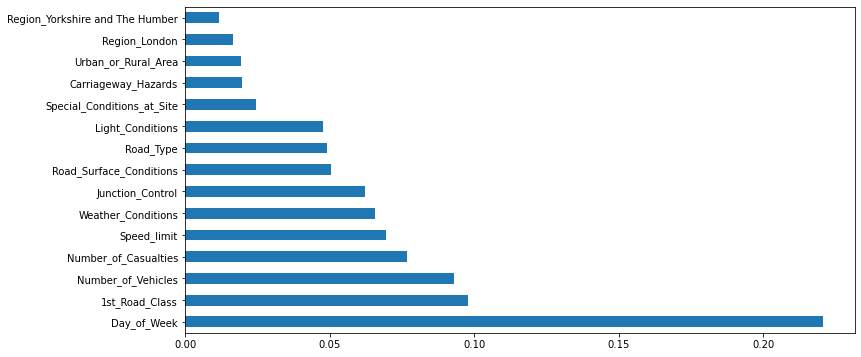

In [9]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
pylab.savefig(r"C:\Users\DETCAO03\1.6mil-Accidents-UK\03_Code\04_Pictures\Random_Forest_Influencing_without_LATLON.png")

### Export files as .pkl

In [ ]:
pickle.dump(lin_reg,open('lin_model.pkl','wb'))
pickle.dump(log_reg,open('log_model.pkl','wb'))
pickle.dump(dt,open('dt_model.pkl','wb'))
pickle.dump(nb,open('nb_model.pkl','wb'))
#pickle.dump(rf,open('rf_model.pkl','wb'))
#pickle.dump(svc_model,open('svc_model.pkl','wb'))

### Tune Parameter

In [25]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


MemoryError: Unable to allocate 63.4 MiB for an array with shape (10, 830906) and data type int64

In [ ]:
y_pred = grid_search.predict(X_test)
acc_r1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Cohen Kappa: "+str(cohen_kappa_score(y_test,y_pred)))
print("Accuracy" , acc_rf)
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)